# Desafío - Boosting Classifiers
## Daniela Hurtado

# Ejercicio 1: Preprocesamiento

* Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
* En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    * Para las variables categóricas, recodifíquelas en variables binarias.
    * Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('churn_train.csv')

In [3]:
df.shape

(3333, 21)

In [4]:
df.head(2)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,no


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

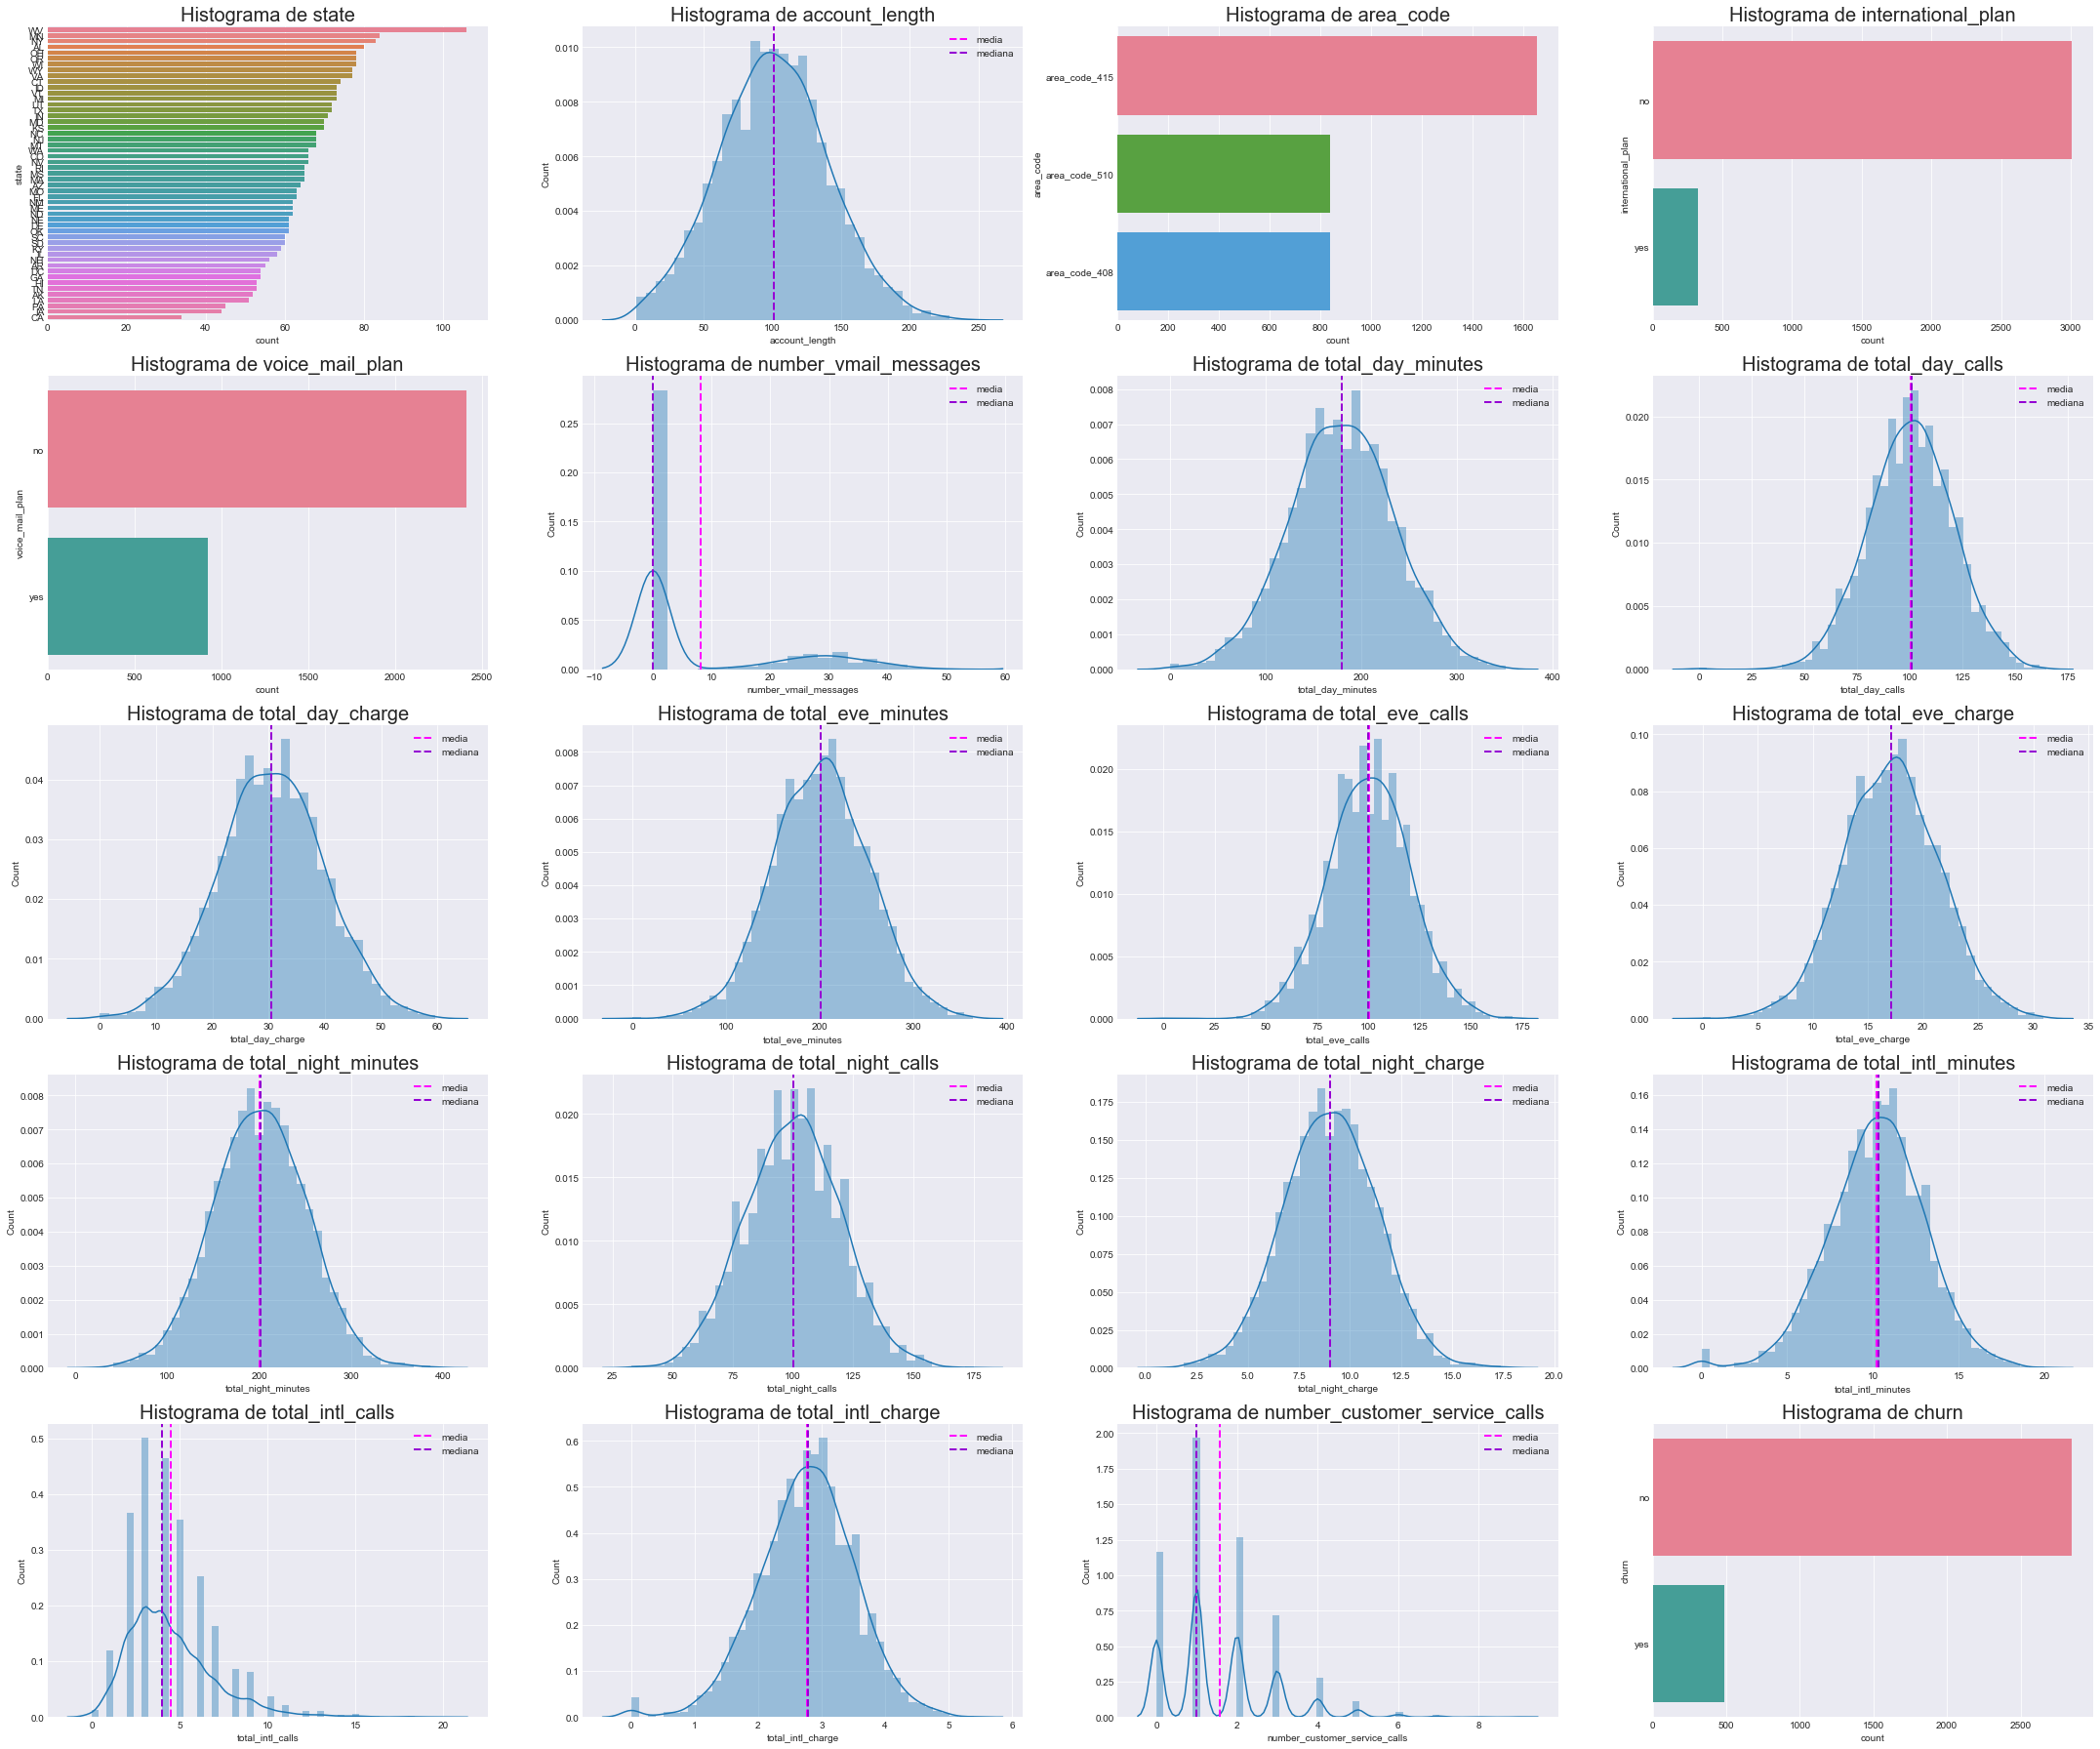

In [8]:
#Grafico del comportamiento distributivo de los atributos y de la variable dependiente.

plt.figure(figsize=(30,25))
rows = 5; cols = df.shape[1]/rows
   
for index, (colname, serie) in enumerate (df.iteritems()):
    plt.subplot(rows, cols, index + 1)
    
    if serie.dtype == 'int64' or serie.dtype == 'float64':
        sns.distplot(serie, kde=True)# kde es la curva
        plt.axvline(np.mean(serie), color='magenta',linestyle='--', label = "media", lw=2)
        plt.axvline(np.median(serie), color='darkviolet', linestyle='--', label='mediana', lw=2)
        plt.title('Histograma de {}'.format(colname), fontsize=20)
        plt.xlabel(colname)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.legend()
    
    else:
        sns.countplot(y = serie, order = serie.value_counts().index, palette="husl") 
        plt.title('Histograma de {}'.format(colname), fontsize=20)

In [9]:
# creamos un nueva variable donde guardaremos las variables tipo objeto
variable_objeto = []

for colname, serie in df.iteritems():
    if serie.dtype =='O':
        variable_objeto.append(colname)
    
variable_objeto

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [10]:
# generamos un nuevo objeto con variables dummies
df_dummy = pd.get_dummies(df,prefix=variable_objeto,prefix_sep='_',drop_first=True, dummy_na=False)

In [11]:
# verificamos consultando las dos primeras filas
df_dummy.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,1,0,0,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,1,0,0,1,0


# Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva
en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes
especificaciones:

* AdaBoostClassifier : {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
* GradientBoostingClassifier: {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [13]:
df_dummy.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', '

### Train

In [14]:
# Separamos los vectores objetivo y atributos
y_vec_train = df_dummy.loc[:,'churn_yes']
x_mat_train= df_dummy.drop('churn_yes', axis=1)

# Generamos conjunto de entrenamiento (train) y validación (test), con semilla pseudoaleatoria y segmentación del 33%
#X_train, X_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=.33, random_state= 23748)
#ESTA PARTE NO VA PORQUE LA DATA YA VIENE ENTRENADA!!!

In [15]:
y_vec_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_yes, dtype: uint8

In [16]:
y_vec_train.value_counts()

0    2850
1     483
Name: churn_yes, dtype: int64

In [17]:
x_mat_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


### Test

In [18]:
df2 = pd.read_csv('churn_test.csv')

In [19]:
df2.head(3)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no


In [20]:
# borramos unnamed
df2.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [21]:
#creamos un nueva variable donde guardaremos las variables tipo objeto
variable_objeto2 = []

for colname, serie in df2.iteritems():
    if serie.dtype =='O':
        variable_objeto2.append(colname)
    
variable_objeto2

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [22]:
# generamos un nuevo objeto con variables dummies
df_dummy2 = pd.get_dummies(df2,prefix=variable_objeto2,prefix_sep='_',drop_first=True, dummy_na=False)

In [23]:
df_dummy2.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,...,0,0,0,0,0,0,1,0,0,0
1,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,...,0,0,0,0,0,0,1,0,0,0
2,103,29,294.7,95,50.10,237.3,105,20.17,300.3,127,...,0,0,0,0,0,0,0,0,1,0
3,99,0,216.8,123,36.86,126.4,88,10.74,220.6,82,...,0,0,0,0,0,1,0,0,0,0
4,108,0,197.4,78,33.56,124.0,101,10.54,204.5,107,...,0,0,0,0,0,1,0,0,0,0


In [24]:
df_dummy2.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AL', 'state_AR', 'state_AZ',
       'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME',
       'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC',
       'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', '

In [25]:
# Separamos los test
y_vec_test = df_dummy2.loc[:,'churn_yes']
x_mat_test= df_dummy2.drop('churn_yes', axis=1)

In [26]:
y_vec_test.value_counts()

0    1443
1     224
Name: churn_yes, dtype: int64

In [27]:
x_mat_test.head(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,101,0,70.9,123,12.05,211.9,73,18.01,236.0,73,...,0,0,0,0,0,0,0,1,0,0
1,137,0,223.6,86,38.01,244.8,139,20.81,94.2,81,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#help(GridSearchCV)

### AdaBoostClassifier

In [29]:
# importamos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

# definimos los parametros: max_depth:con una profundidad de ramas hasta 32, max_features: evaluando todos los atributos en la matriz

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=2378),                                
                                # param_grid colocamos los parametros definidos anteriormente
                                param_grid={'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]},                                
                                cv=5, n_jobs=-1).fit(x_mat_train, y_vec_train)

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score='warn')

In [ ]:
#help(AdaBoostClassifier)

In [30]:
# mejores parametros
grid_ada.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [36]:
ada_best = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 100).fit(x_mat_train, y_vec_train)

### GradientBoostClassifier

In [31]:
grid_gradientB = GridSearchCV(GradientBoostingClassifier(random_state=2378),                                
                                # param_grid colocamos los parametros definidos anteriormente
                                param_grid={'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],
                                            'subsample': [0.1,0.5,0.9]},                             
                                cv=5, n_jobs=-1).fit(x_mat_train, y_vec_train)

In [32]:
grid_gradientB.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.5}

In [44]:
gradient_best = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 2000, subsample = 0.5).fit(x_mat_train, y_vec_train)

# Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los
que aumentan la probabilidad de fuga en los clientes.
* tip: Pueden implementar la función plot_importance que se encuentra en la lectura de
Bagging y Random Forest.

In [38]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :feat_names: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importances = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importances]
    plt.title('Feature importance')
    plt.barh(range(len(feat_names)), tmp_importance[sort_importances])
    plt.yticks(range(len(feat_names)), names, rotation=0)

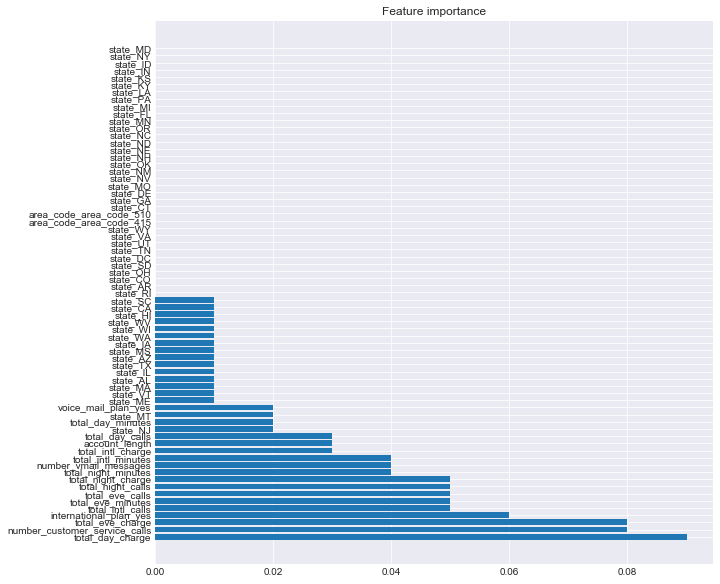

In [42]:
# Para Ada
plt.figure(figsize = (10,10))
plot_importance(ada_best, x_mat_train.columns)

Variables con mayor importancia relativa = total_day_charge, number_customer_service_calls, total_eve_charge,international_plan_yes

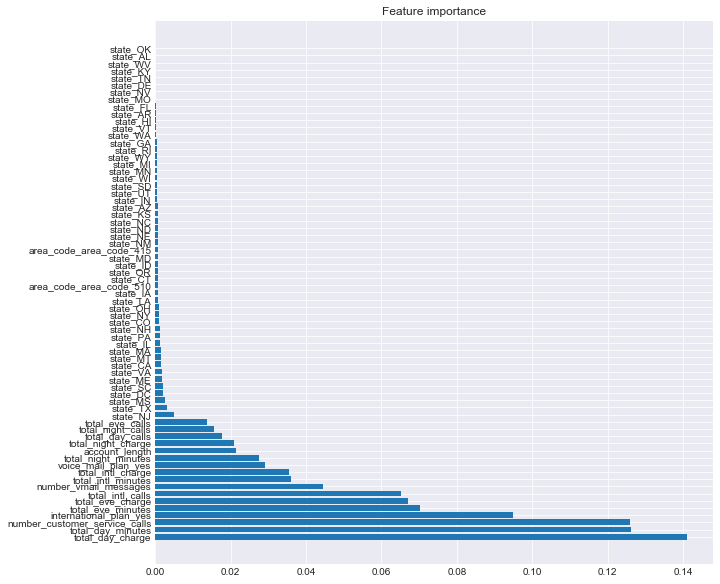

In [45]:
# Para Gradient
plt.figure(figsize = (10,10))
plot_importance(gradient_best, x_mat_train.columns)

Variables con mayor importancia relativa = total_day_charge, total_day_minutes, number_customer_service_calls, international_plan_yes

# Ejercicio 4: Probabilidad de fuga

In [94]:
#Ada
results_ada = ada_best.predict_proba(x_mat_test)[0]
results_ada

array([0.51742284, 0.48257716])

In [95]:
ada_best.classes_

array([0, 1], dtype=uint8)

In [96]:
results_ordered_by_probability = map(lambda x: x[0], sorted(zip(ada_best.classes_, results_ada), key=lambda x: x[1], reverse=True))
results_ordered_by_probability

In [97]:
# Gradient
results_gradient = gradient_best.predict_proba(x_mat_test)[0]
results_gradient

array([0.97719164, 0.02280836])

In [98]:
gradient_best.classes_

array([0, 1], dtype=uint8)

In [99]:
results_ordered_by_probability = map(lambda x: x[0], sorted(zip(gradient_best.classes_, results_gradient), key=lambda x: x[1], reverse=True))
results_ordered_by_probability